<a href="https://colab.research.google.com/github/MandalaSandeep16/Deeplearning/blob/main/AutoEncoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/SO2_MODIFIED.csv')
data

,TimeStamp,3207010,33204020,29209010,33202110,14104030,8344010,43202020,34202020,28209010,...,23211040,12201160,11222020,15201150,27201030,20202050,5203020,34207090,27210010,44214010
0,2018-01-01 00:00:00,0.000,0.005,0.003,0.003,0.002,0.0,0.000,0.001,0.001,...,0.000,0.001,0.000,0.001,0.006,0.003,0.000,0.001,0.0,0.002
1,2018-01-01 01:00:00,0.000,0.005,0.003,0.003,0.002,0.0,0.000,0.001,0.001,...,0.000,0.001,0.000,0.001,0.006,0.003,0.000,0.001,0.0,0.002
2,2018-01-01 02:00:00,0.000,0.005,0.003,0.003,0.005,0.0,0.000,0.001,0.001,...,0.000,0.000,0.000,0.001,0.004,0.003,0.000,0.001,0.0,0.003
3,2018-01-01 03:00:00,0.000,0.007,0.002,0.004,0.005,0.0,0.000,0.001,0.001,...,0.000,0.000,0.000,0.001,0.004,0.003,0.001,0.001,0.0,0.003
4,2018-01-01 04:00:00,0.000,0.004,0.002,0.003,0.004,0.0,0.001,0.001,0.001,...,0.000,0.000,0.000,0.000,0.004,0.003,0.001,0.001,0.0,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51115,2023-10-31 19:00:00,0.001,0.001,0.001,0.006,0.003,0.0,0.001,0.001,0.001,...,0.001,0.001,0.002,0.000,NaN,0.000,0.000,0.001,NaN,0.001
51116,2023-10-31 20:00:00,0.000,0.001,0.000,0.004,0.003,0.0,0.000,0.000,0.000,...,0.001,0.001,0.002,0.000,NaN,0.000,0.000,0.001,NaN,0.001
51117,2023-10-31 21:00:00,0.000,0.001,0.000,0.004,0.003,0.0,0.000,0.001,0.001,...,0.000,0.001,0.002,0.000,NaN,0.000,0.000,0.001,NaN,0.001
51118,2023-10-31 22:00:00,0.001,0.001,0.000,0.003,0.004,0.0,0.000,0.001,0.001,...,0.000,0.001,0.001,0.000,NaN,0.000,0.000,0.000,NaN,0.002


In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
#Load the datset
dataset=pd.read_csv('/content/drive/MyDrive/SO2_MODIFIED.csv')

#selectt the column 'v for the prediction
selected_col= '29209010'

In [ ]:
#Spliting the data
train_data, test_data = train_test_split(dataset[selected_col], test_size=0.2, shuffle=False)
#define the forcasting horiz
forecast_horizon = 12

In [ ]:
def create_dataset(data, forecast_horizon):
  X, y = [], []
  for i in range(len(data)-forecast_horizon-1):
    X.append(data[i:(i+forecast_horizon)])
    # Ensure you are not going out of bounds
    if i + forecast_horizon < len(data):
        y.append(data[i+forecast_horizon])
  return np.array(X), np.array(y)

In [ ]:
# prompt: Prepare the training and test data

X_train, y_train = create_dataset(train_data.values, forecast_horizon)
X_test, y_test = create_dataset(test_data.values, forecast_horizon)


In [ ]:


# Build the Autoencoder model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(forecast_horizon,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),  # Bottleneck layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(forecast_horizon)  # Output layer
])

model.compile(optimizer='adam', loss='mse')


In [ ]:
# Compile and train the Autoencoder model
model.fit(X_train, X_train, epochs=12, batch_size=32, validation_data=(X_test, X_test))


Epoch 1/12
1278/1278 [==============================] - 5s 3ms/step - loss: 4.9478e-07 - val_loss: 1.8870e-07
Epoch 2/12
1278/1278 [==============================] - 6s 5ms/step - loss: 2.7145e-07 - val_loss: 2.1078e-07
Epoch 3/12
1278/1278 [==============================] - 4s 3ms/step - loss: 2.4675e-07 - val_loss: 1.6249e-07
Epoch 4/12
1278/1278 [==============================] - 4s 3ms/step - loss: 1.9412e-07 - val_loss: 1.8332e-07
Epoch 5/12
1278/1278 [==============================] - 5s 4ms/step - loss: 1.8302e-07 - val_loss: 1.3727e-07
Epoch 6/12
1278/1278 [==============================] - 4s 3ms/step - loss: 1.7182e-07 - val_loss: 1.9948e-07
Epoch 7/12
1278/1278 [==============================] - 4s 3ms/step - loss: 1.6615e-07 - val_loss: 1.5195e-07
Epoch 8/12
1278/1278 [==============================] - 4s 3ms/step - loss: 1.5809e-07 - val_loss: 1.3790e-07
Epoch 9/12
1278/1278 [==============================] - 6s 5ms/step - loss: 1.4580e-07 - val_loss: 1.2678e-07
Epoch 10/1

In [ ]:
# prompt: Make predictions on the test data using the Autoencoder

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, predictions[:, -1]))
print('RMSE:', rmse)


320/320 [==============================] - 1s 2ms/step
RMSE: 0.000522745405475829


In [ ]:
# Reshape the encoded data to match the original input shape

# Get the encoded representation from the bottleneck layer
encoder = tf.keras.Model(inputs=model.input, outputs=model.layers[2].output)
encoded_data = encoder.predict(X_test)

# Reshape the encoded data to match the original input shape
reshaped_encoded_data = encoded_data.reshape(encoded_data.shape[0], encoded_data.shape[1], 1)

# Print the shape of the reshaped encoded data
print("Reshaped Encoded Data Shape:", reshaped_encoded_data.shape)


320/320 [==============================] - 0s 1ms/step
Reshaped Encoded Data Shape: (10211, 32, 1)


In [ ]:
# Reshape X_test to be 2D
X_test_2D = X_test.reshape(X_test.shape[0], -1)

print("Reshaped X_test Shape:", X_test_2D.shape)


Reshaped X_test Shape: (10211, 12)


In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions[:, -1]))
print('RMSE:', rmse)


RMSE: 0.000522745405475829


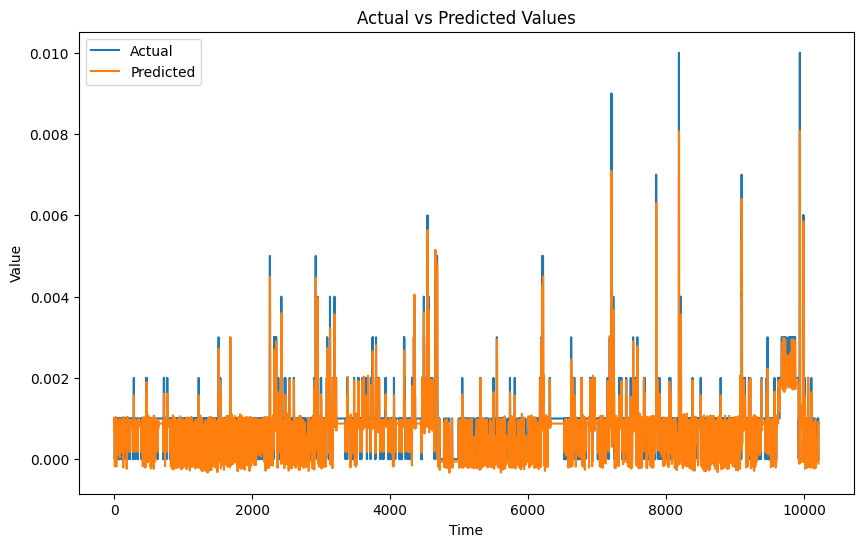

In [ ]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions[:, -1], label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.show()
